In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pandas import Series,DataFrame
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats
import scipy.optimize
import scipy.spatial
from IPython import display
from ipywidgets import interact ,widgets
import scipy.stats as stats
import math
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, make_scorer

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [3]:
data = fetch_openml(name='bank-marketing', version=1)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [5]:
X=data.data
y=data.target

In [6]:
len(X)

45211

In [7]:
X_train1,X_test1,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [8]:
X_train=scaler.fit(X_train1).transform(X_train1)
X_test=scaler.fit(X_test1).transform(X_test1)

# DECISION TREE #

In [9]:
from sklearn import tree
model=tree.DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [10]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [11]:
model.score(X_test,y_test)

0.8971580227800509

In [12]:
y_predicted=model.predict(X_test)

In [13]:
cm=confusion_matrix(y_test,y_predicted)

Text(0.5, 1.0, 'confusion matrix of decision tree classifier for bank marketing  dataset')

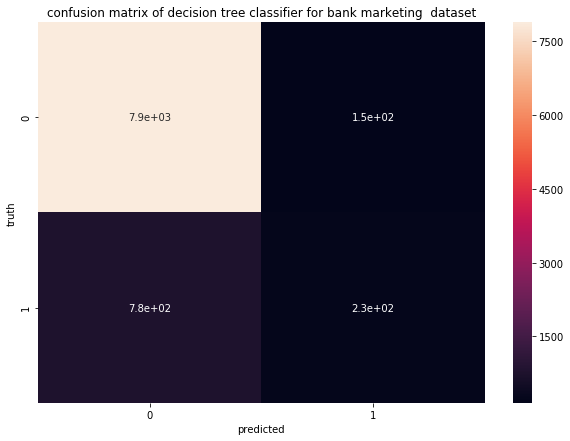

In [14]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")
plt.title("confusion matrix of decision tree classifier for bank marketing  dataset")

In [15]:
FP1 = cm.sum(axis=0) - np.diag(cm)  
FN1 = cm.sum(axis=1) - np.diag(cm)
TP1 = np.diag(cm)
TN1 = cm.sum() - (FP1 + FN1 + TP1)

# Sensitivity, hit rate, recall, or true positive rate
TPR1 = TP1/(TP1+FN1)
# Specificity or true negative rate
TNR1 = TN1/(TN1+FP1) 
# Precision or positive predictive value
PPV1 = TP1/(TP1+FP1)
# Negative predictive value
NPV1 = TN1/(TN1+FN1)
# Fall out or false positive rate
FPR1 = FP1/(FP1+TN1)
# False negative rate
FNR1 = FN1/(TP1+FN1)
# False discovery rate
FDR1 = FP1/(TP1+FP1)

# Overall accuracy
ACC = (TP1+TN1)/(TP1+FP1+FN1+TN1)
print(FP1,FN1,TP1,TN1)

[779 151] [151 779] [7884  229] [ 229 7884]


# ROC CURVE #

In [16]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [17]:
dt_roc_auc=roc_auc_score(y_test,model.predict(X_test))

TypeError: unsupported operand type(s) for -: 'str' and 'str'

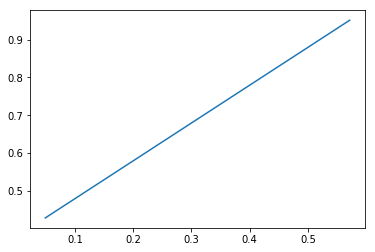

In [35]:
plt.figure()
plt.plot(FPR1,TPR1,label='ROC curve for decision tree classifier')

# LOGISTIC REGRESSION #

In [88]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [89]:
lr.fit(X_train,y_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [90]:
lr.score(X_test,y_test)

0.8917101654428028

In [91]:
y_predicted=lr.predict(X_test)

In [92]:
cm=confusion_matrix(y_test,y_predicted)

Text(0.5, 1.0, 'confusion matrix of logistic regression classifier for bank marketing dataset')

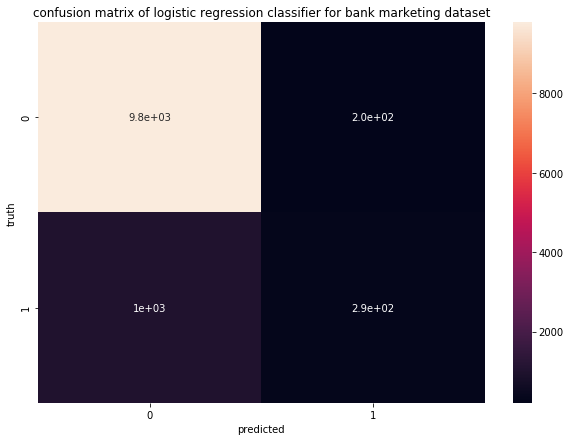

In [93]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")
plt.title("confusion matrix of logistic regression classifier for bank marketing dataset")

# KNN #

In [94]:
from sklearn.neighbors import KNeighborsClassifier

In [95]:
knn=KNeighborsClassifier(n_neighbors=15)

In [96]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')

In [97]:
knn.score(X_test,y_test)

0.8948066884897815

In [98]:
y_predicted=knn.predict(X_test)

In [99]:
cm=confusion_matrix(y_test,y_predicted)

Text(0.5, 1.0, 'confusion matrix of KNN classifier for bank marketing dataset')

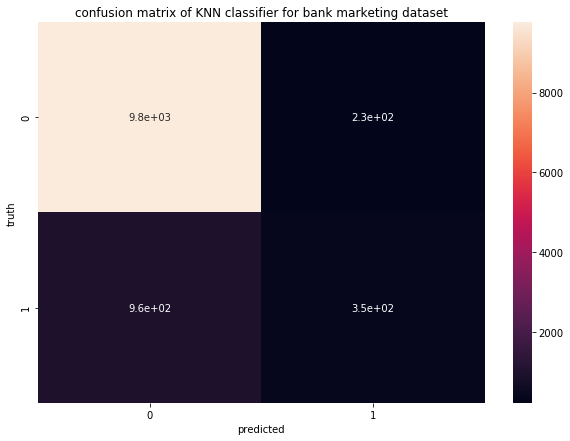

In [100]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")
plt.title("confusion matrix of KNN classifier for bank marketing dataset")

# RANDOM FOREST #

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
model=RandomForestClassifier(n_estimators=100)

In [103]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [104]:
y_predicted=model.predict(X_test)

In [105]:
model.score(X_test,y_test)

0.9057772272847916

In [106]:
cm=confusion_matrix(y_test,y_predicted)

Text(0.5, 1.0, 'confusion matrix of random forest classifier for bank marketing dataset')

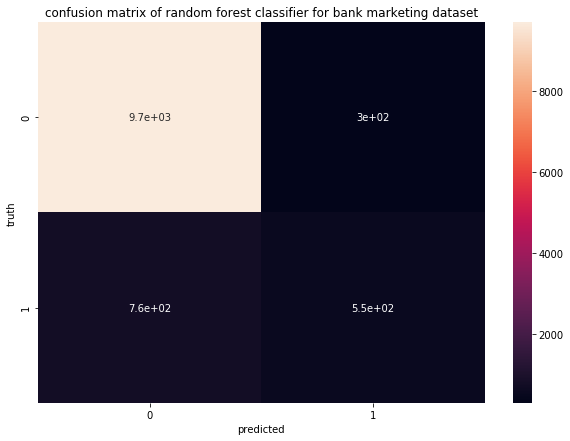

In [107]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")
plt.title("confusion matrix of random forest classifier for bank marketing dataset")

# MLP #

In [108]:
from sklearn.neural_network import MLPClassifier

In [109]:
mlp=MLPClassifier(max_iter=1500,random_state=300)
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=300, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [110]:
mlp.score(X_test,y_test)

0.8950721047509511

In [111]:
y_predicted=mlp.predict(X_test)

In [112]:
cm=confusion_matrix(y_test,y_predicted)

Text(0.5, 1.0, 'confusion matrix of MLP classifier for bank marketing dataset')

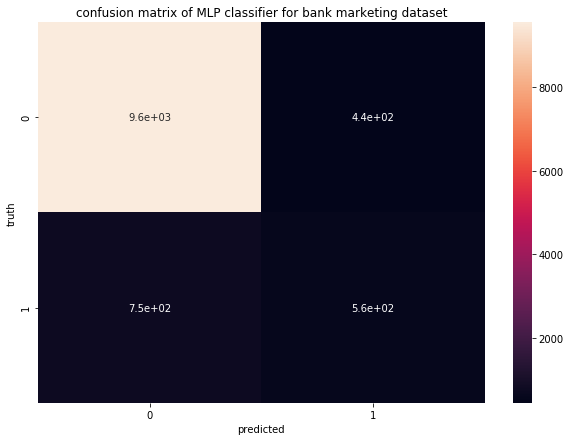

In [113]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")
plt.title("confusion matrix of MLP classifier for bank marketing dataset")

# SVM #

In [114]:
from sklearn.svm import SVC

In [115]:
model=SVC(gamma='scale')
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [116]:
y_predicted=model.predict(X_test)

In [117]:
model.score(X_test,y_test)

0.8971954348403078

In [118]:
cm=confusion_matrix(y_test,y_predicted)

Text(0.5, 1.0, 'confusion matrix of SVM classifier for bank marketing dataset')

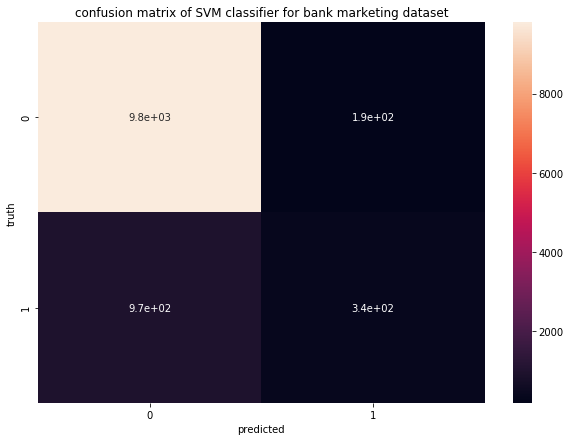

In [119]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")
plt.title("confusion matrix of SVM classifier for bank marketing dataset")

# NAIVE BAYES #

In [131]:
import sklearn
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [132]:
bnb=BernoulliNB(binarize=0.1)
bnb.fit(X_train,y_train)
bnb.score(X_test,y_test)

0.8649915951517296

In [133]:
y_predicted=bnb.predict(X_test)

In [134]:
cm=confusion_matrix(y_test,y_predicted)

Text(0.5, 1.0, 'confusion matrix of Naive-Bayes(Barnouli) classifier for bank marketing dataset')

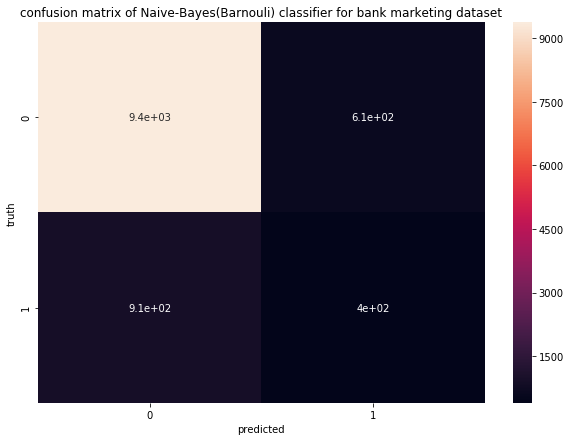

In [135]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")
plt.title("confusion matrix of Naive-Bayes(Barnouli) classifier for bank marketing dataset")

In [136]:
gnb=GaussianNB()
gnb.fit(X_train,y_train)
gnb.score(X_test,y_test)

0.8389808015571087

In [137]:
y_predicted=gnb.predict(X_test)

In [138]:
cm=confusion_matrix(y_test,y_predicted)

Text(0.5, 1.0, 'confusion matrix of Naive-Bayes(Gaussian) classifier for bank marketing datase')

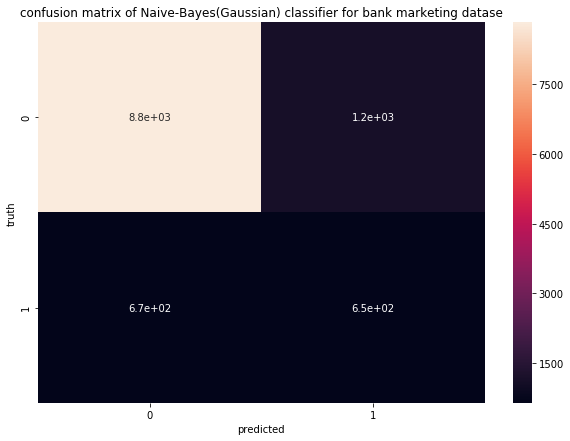

In [139]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")
plt.title("confusion matrix of Naive-Bayes(Gaussian) classifier for bank marketing datase")